# OpenCV 이미지 처리 기초
## Lesson 1: 흥미로운 영역 오려오기

우리가 언제나 사용하는 OpenCV2와 NumPy를 import 합니다.

In [1]:
import numpy as np
import cv2   as cv

### cv.selectROI() 함수 활용하기

In [11]:
I = cv.imread("cats.jpg")
x, y, w, h = cv.selectROI("cats", I, False)

if w and h:
    R = I[y:y+h, x:x+w]
    cv.imshow('ROI', R)
    # cv.moveWindow('ROI', 0,0)
    cv.imwrite('cats_roi.jpg', R)

cv.imshow("cats", I)
cv.waitKey()
cv.destroyAllWindows()

#### R의 크기는 어떻게 될까요?

In [20]:
R.shape

(171, 238, 3)

In [19]:
x, y, w, h

(187, 15, 238, 171)

#### 이 때 R 값을 바꾸면 어떻게 될까요?

In [14]:
R[:,:,0],R[:,:,1],R[:,:,2] = 0,0,255
cv.imshow("ROI", R)
cv.imshow("cats", I)
cv.waitKey()
cv.destroyAllWindows()

#### R이 바뀌어도 I에 영향을 주지 않는 방법은?

In [22]:
I = cv.imread("cats.jpg")
R = I[y:y+h, x:x+w].copy()
R[:,:,0],R[:,:,1],R[:,:,2] = 0,0,255
cv.imshow("ROI", R)
cv.imshow("cats", I)
cv.waitKey()
cv.destroyAllWindows()

## Lesson 2: Thresholding (이진화)
### 흑백 이미지 이진화

In [62]:
P = cv.imread("road.jpg", cv.IMREAD_UNCHANGED)
G = cv.cvtColor( P, cv.COLOR_BGR2GRAY)

- P와  G의 shape을 비교해 보세요.

In [63]:
print(f"P:{P.shape}, G:{G.shape}")

P:(419, 640, 3), G:(419, 640)


아예, 읽을 때부터 흑백으로 읽어 오는 방법도 있습니다.

In [55]:
G1 = cv.imread("road.jpg", cv.IMREAD_GRAYSCALE)

### cv.threshold() 함수 
ret, out = cv.threshold( img, threshold, value, type_flag)
- ret: threholding에 적용한 경계값
- out: 결과 이미지
- type_flag
  - cv.THRESH_BINARY
  - cv.THRESH_BINARY_INV
  - cv.THRESH_TRUNC
  - cv.THRESH_TOZERO
  - cv.THRESH_TOZERO_INV
  

In [64]:
_,T1  = cv.threshold(G1, 128, 255, cv.THRESH_BINARY )
r2,T2 = cv.threshold(G1,  -1, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

그 결과를 확인해 보겠습니다.

In [58]:
cv.imshow("Road 128",  T1)
cv.imshow("Road Otsu", T2)
cv.waitKey()
cv.destroyAllWindows()

지금까지의 threshold 방법은 이미지 전체에 대해 1개의 threshold 값을 적용하는 방법이었지만, 영역별로 다른 thredhold가 필요할 때도 있습니다. 이경우 cv.adaptiveThreshold() 함수를 이용합니다.
### cv.adaptiveThreshold( img, value, method, type_flag, block_size, correction_factor)
- value: 경계값을 만족할 때 적용할 값
- method
  - cv.ADAPTIVE_THRESH_MEAN_C
  - cv.ADAPTIVE_THRESH_GAUSSIAN_C
- block_size: 영역 크기 (n x n), 홀수 3, 5, 7, ...
- 계산된 경계값에 가감할 값

In [217]:
T3 = cv.adaptiveThreshold(G1, 255, cv.ADAPTIVE_THRESH_MEAN_C,     cv.THRESH_BINARY, 9, 0)
T4 = cv.adaptiveThreshold(G1, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 9, 0)

In [218]:
cv.imshow("Road 128",  T1)
cv.imshow("Road Otsu", T2)
cv.imshow("Road Mean",  T3)
cv.imshow("Road Gaussian", T4)
cv.waitKey()
cv.destroyAllWindows()

### 여러 그림을 창 하나에 보여 주기
- [matplotlib.pyplot 을 이용](https://matplotlib.org/)

In [71]:
import matplotlib.pyplot as plt

In [220]:
imgs = {"Road": G, f"Otsu({r2})":T2, "Adaptive Mean":T3, "Adaptive Gaussian":T4}

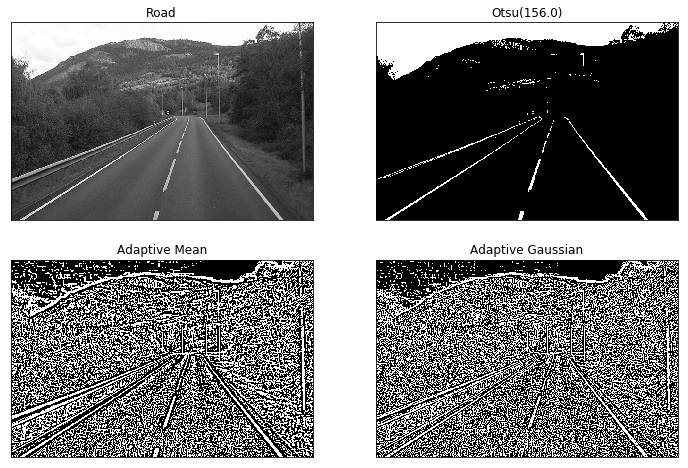

In [221]:
plt.figure(figsize=(12,8)) # 크기조정, 인치, inch, 2.54cm
for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]), plt.yticks([])
plt.show()

### Lesson 3: 이미지 합성하기
#### 두 이미지 더하기
도로 이미지에 자동차를 올려 보겠습니다

In [222]:
C = cv.imread("car01.png", cv.IMREAD_UNCHANGED)

In [223]:
C.shape

(190, 257, 4)

In [226]:
Ca = C[:,:,3]
Cg = cv.cvtColor(C, cv.COLOR_BGR2GRAY)

In [225]:
C.shape, Cg.shape, Ca.shape

((190, 257, 4), (190, 257), (190, 257))

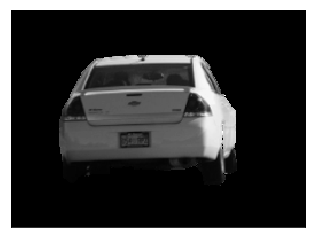

In [227]:
plt.imshow(Cg,'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [107]:
Cx = np.zeros_like(G)

In [230]:
Cx.shape, Cx.dtype

((419, 640), dtype('uint8'))

In [231]:
Cx[200:200+190,200:200+257] = Cg

In [229]:
G.shape, Cg.shape

((419, 640), (190, 257))

In [232]:
GC = cv.add( G, Cx)

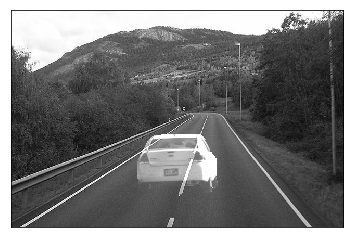

In [95]:
plt.imshow(GC,'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [109]:
M = np.zeros_like(G)
M[200:200+190,200:200+257]  = Ca
M = (M/255).astype(np.uint8)

In [110]:
S = np.add( np.multiply(1-M,G), np.multiply(M,Cx))

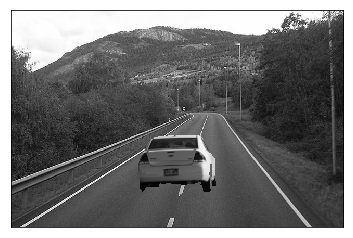

In [111]:
plt.imshow(S,'gray')
plt.xticks([]), plt.yticks([])
plt.show()

### 알파 블렌딩

크기가 같은 두 그림 파일을 준비합니다. 

In [127]:
B = cv.imread("Bruce02.png")
H = cv.imread("Hulk02.png")

In [233]:
B.shape, H.shape

((457, 597, 3), (457, 597, 3))

그림을 보여 줄 윈도우와 블렌딩을 조절할 트랙바 이름을 설정합니다.

In [234]:
title   = "Bruce and Hulk"
blender = "Blender"

트랙바의 콜백 함수를 작성합니다.

In [235]:
def blend(x):
    a = x / 100
    M = cv.addWeighted(B, 1-a, H, a, 0)
    cv.imshow(title, M)

그림과 트랙바를 나타냅니다.

In [237]:
cv.imshow(title, B)
cv.createTrackbar( blender, title, 0, 100, blend)
cv.waitKey()
cv.destroyAllWindows()

### 이미지 마스킹하기

In [146]:
L  = cv.imread("Lily.png")

In [238]:
L.shape

(470, 704, 3)

In [146]:
L1 = cv.cvtColor(L, cv.COLOR_BGR2RGB)

In [239]:
L1.shape

(470, 704, 3)

In [243]:
Lm = np.zeros_like(L)
title = "Lily"
cv.imshow(title, L)

def onMouse( event, x, y, flags, param ):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle( L, (x,y),  120, (  0,255,255),  2)
        cv.circle( Lm, (x,y), 120, (255,255,255), -1)
        cv.imshow(title, L)

cv.setMouseCallback( title, onMouse )
cv.waitKey(0)
cv.destroyAllWindows()

- cv.bitwise_and(a,b) 를 AND 연산
- cv.bitwise_or(a,b) 
- cv.bitwise_xor(a,b) 
- cv.bitwise_not(a,b) 

In [151]:
Lmasked = cv.bitwise_and(L1, Lm)
imgs = {"Original": L1, "Masked":Lmasked}

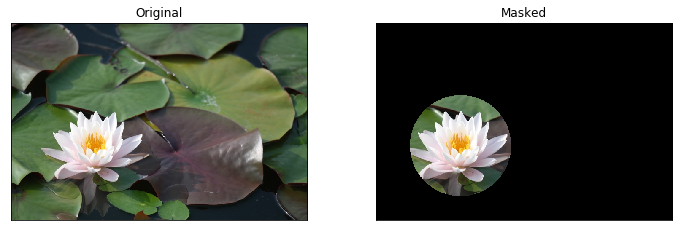

In [152]:
plt.figure(figsize=(12,8))
for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v)
    plt.xticks([]), plt.yticks([])
plt.show()

-  연습: 마우스로 네모 영역을 클릭 후 드래그하여 선택하고 그 부분만 마스킹하여 보여 주시오.

In [ ]:
#

## 두 그림이 어디가 다를까요?

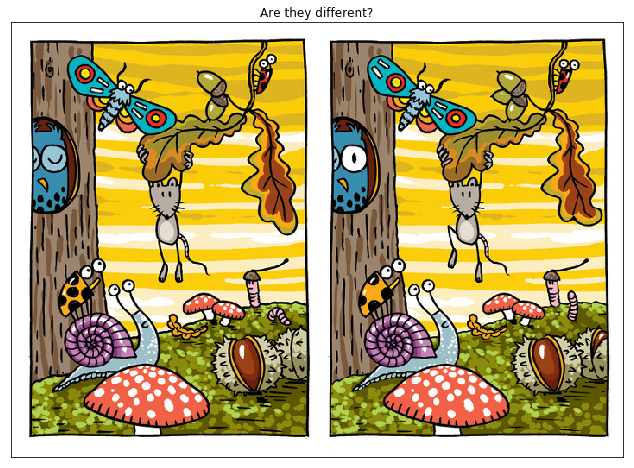

In [159]:
two = cv.imread("two_figures.png")
plt.figure(figsize=(12,8))
plt.title("Are they different?")
plt.imshow(cv.cvtColor(two,cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

어떻게 하면 두 그림의 차이를 쉽게 찾아 낼 수 있을까요?
1. 첫 번째 그림의 영역을 선택한다.
2. 선택된 영역과 가장 닮은 오른 쪽 영역을 찾는다.
3. 두 영역의 차 이미지를 나타낸다.

In [156]:
x, y, w, h = cv.selectROI("Two", two, False)

if w and h:
    R = two[y:y+h, x:x+w]
    cv.imshow('ROI', R)
    cv.moveWindow('ROI', 0,0)
    cv.imwrite('Left.jpg', R)

cv.imshow("Two", two)
cv.waitKey()
cv.destroyAllWindows()

In [160]:
x, y, w, h

(15, 16, 335, 471)

In [163]:
N = 20 # search window size
Px = x + w # initial position for horizontal search
diff_sum = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Rc = two[j:j+h,Px+i:Px+i+w,:]
        D  = cv.absdiff(R, Rc)
        diff_sum[i,j] = np.sum(D)

In [189]:
x2, y2 = np.unravel_index(diff_sum.argmin(), diff_sum.shape)

In [190]:
R2 = two[y2:y2+h, Px+x2:Px+x2+w]

In [244]:
Rd = cv.absdiff(R, R2)
RdG = cv.cvtColor(Rd, cv.COLOR_BGR2GRAY)
#th,Rt = cv.threshold(RdG,  -1, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
th,Rt = cv.threshold(RdG,  100, 255, cv.THRESH_BINARY)
cv.imshow("Different", Rt)
cv.waitKey()
cv.destroyAllWindows()


- 차영상 절대값의 분포: 히스토그램


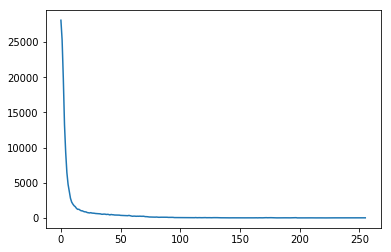

In [197]:
hist = cv.calcHist([RdG], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

In [216]:
Mask = np.zeros(two.shape[:2], np.uint8)
Mask[y:y+h, x:x+w] = Rt
Mask[y2:y2+h, Px+x2:Px+x2+w] = Rt
MaskC = cv.merge((Mask,Mask,Mask))
DiffTwo = cv.bitwise_and(two, MaskC)

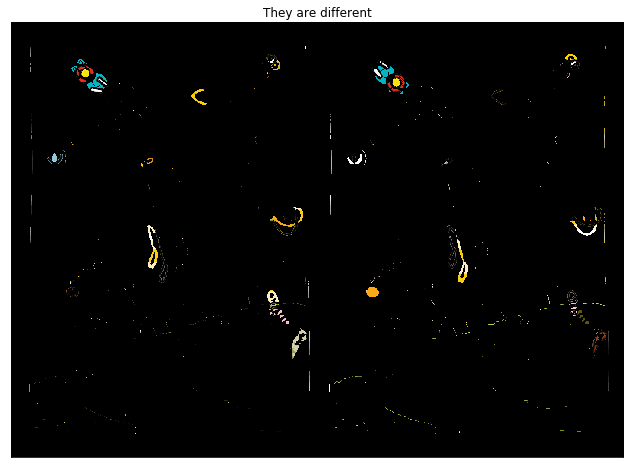

In [216]:
plt.figure(figsize=(12,8))
plt.title("They are different")
plt.imshow(cv.cvtColor(DiffTwo,cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

In [248]:

cv.destroyAllWindows()
